<a href="https://colab.research.google.com/github/AaronRM9416/Core-Classwork/blob/main/neural_networks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Aaron Musselwhite

9/29/22

In [32]:
import matplotlib.pyplot as plt
from tensorflow.keras import Sequential
from tensorflow.keras import metrics
from tensorflow.keras.layers import Dense, Dropout 
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import make_column_transformer
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.compose import make_column_selector, make_column_transformer
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder, \
OrdinalEncoder
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from sklearn import set_config
set_config(display='diagram')

In [2]:
data = pd.read_csv('https://docs.google.com/spreadsheets/d/e/2PACX-1vT-ujzSVy10DReTFi53El9eIC4gZA66pUYsu8Ew10Xdn26EeoqS5EMjt3Nzn55YRWxQ70zlXbELIWT_/pub?output=csv')

In [3]:
df = data
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [5]:
df.duplicated().any()

False

In [6]:
df.isna().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

# X/Y split & preprocessing

In [7]:
# Drop missings
df.drop(columns=['PoolQC', 'Fence', 'MiscFeature', 'FireplaceQu', 'Alley', 'Id'], inplace=True)
# Save X data
X = df.drop(columns = 'SalePrice')
# Encode our target
y = df['SalePrice']

In [8]:
def plot_history(history):
  """Takes a keras model learning history and plots each metric"""
  
  metrics = history.history.keys()
  
  for metric in metrics:
      if not 'val' in metric:
        plt.plot(history.history[f'{metric}'], label=f'{metric}')
        if f'val_{metric}' in metrics:
          plt.plot(history.history[f'val_{metric}'], label=f'val_{metric}')
        plt.legend()
        plt.title(f'{metric}')
        plt.show()

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [10]:
scaler = StandardScaler()
mean_imp = SimpleImputer(strategy='mean')
most_freq_imp = SimpleImputer(strategy='most_frequent')

In [11]:
cat_sel = make_column_selector(dtype_include='object')
num_sel = make_column_selector(dtype_include='number')
OHE = OneHotEncoder(handle_unknown='ignore', sparse=False)

In [12]:
num_pipe = make_pipeline(mean_imp, scaler)

num_pipe

Pipeline(steps=[('simpleimputer', SimpleImputer()),
                ('standardscaler', StandardScaler())])

In [13]:
nom_pipe = make_pipeline(most_freq_imp, OHE)
nom_pipe

Pipeline(steps=[('simpleimputer', SimpleImputer(strategy='most_frequent')),
                ('onehotencoder',
                 OneHotEncoder(handle_unknown='ignore', sparse=False))])

In [14]:
num_tup_pro= (num_pipe,num_sel)
nom_tup_pro= (nom_pipe, cat_sel)

pre_pro = make_column_transformer(num_tup_pro, nom_tup_pro)
pre_pro

ColumnTransformer(transformers=[('pipeline-1',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer()),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7efc4f3ff750>),
                                ('pipeline-2',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False))]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7efc4f3ff790>)])

In [15]:
pre_pro.fit(X_train)

ColumnTransformer(transformers=[('pipeline-1',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer()),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7efc4f3ff750>),
                                ('pipeline-2',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False))]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7efc4f3ff790>)])

In [16]:
X_train_pro = pre_pro.transform(X_train)
X_test_pro = pre_pro.transform(X_test)

In [17]:
print(pd.isna(X_train_pro), 'missing values in training data')
print(pd.isna(X_test_pro), 'missing values in testing data')
print('\n')
print('All data in X_train_pro are', X_train_pro.dtype)
print('All data in X_test_pro are', X_test_pro.dtype)
print('\n')
print('shape of data is', X_train_pro.shape)
print('\n')
X_train_pro

[[False False False ... False False False]
 [False False False ... False False False]
 [False False False ... False False False]
 ...
 [False False False ... False False False]
 [False False False ... False False False]
 [False False False ... False False False]] missing values in training data
[[False False False ... False False False]
 [False False False ... False False False]
 [False False False ... False False False]
 ...
 [False False False ... False False False]
 [False False False ... False False False]
 [False False False ... False False False]] missing values in testing data


All data in X_train_pro are float64
All data in X_test_pro are float64


shape of data is (1095, 266)




array([[ 1.47591094, -1.20217378, -0.68394964, ...,  0.        ,
         1.        ,  0.        ],
       [-0.87122795,  0.33376282, -0.05488258, ...,  0.        ,
         1.        ,  0.        ],
       [-0.16708628, -0.45614743, -0.15252449, ...,  0.        ,
         1.        ,  0.        ],
       ...,
       [-0.87122795, -0.45614743, -0.23280784, ...,  0.        ,
         1.        ,  0.        ],
       [-0.16708628, -0.67556694, -0.28072471, ...,  0.        ,
         1.        ,  0.        ],
       [ 1.47591094, -0.76333475, -0.63856423, ...,  0.        ,
         1.        ,  0.        ]])

In [18]:
input_shape = X_train_pro.shape[1]
input_shape

266

In [19]:
model = Sequential()

In [20]:

model.add(Dense(70, 
                 input_dim = input_shape, 
                activation = 'relu')) 

model.add(Dense(20, 
                activation = 'relu')) 

In [21]:
model.add(Dense(1, activation = 'linear'))

In [22]:
model.compile(loss = 'mse', optimizer = 'adam')

In [23]:
history = model.fit(X_train_pro, y_train,
                    validation_data = (X_test_pro, y_test), 
                    epochs=10)

Epoch 1/10
35/35 [==============================] - 1s 7ms/step - loss: 39089659904.0000 - val_loss: 38881587200.0000
Epoch 2/10
35/35 [==============================] - 0s 3ms/step - loss: 39082549248.0000 - val_loss: 38867726336.0000
Epoch 3/10
35/35 [==============================] - 0s 3ms/step - loss: 39056449536.0000 - val_loss: 38825992192.0000
Epoch 4/10
35/35 [==============================] - 0s 3ms/step - loss: 38992461824.0000 - val_loss: 38736896000.0000
Epoch 5/10
35/35 [==============================] - 0s 3ms/step - loss: 38870499328.0000 - val_loss: 38580805632.0000
Epoch 6/10
35/35 [==============================] - 0s 3ms/step - loss: 38668140544.0000 - val_loss: 38335320064.0000
Epoch 7/10
35/35 [==============================] - 0s 3ms/step - loss: 38366924800.0000 - val_loss: 37982986240.0000
Epoch 8/10
35/35 [==============================] - 0s 3ms/step - loss: 37942059008.0000 - val_loss: 37508780032.0000
Epoch 9/10
35/35 [==============================] - 0s 3

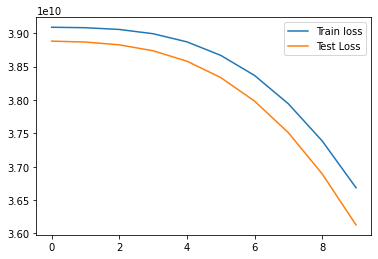

In [24]:
plt.plot(history.history['loss'], label='Train loss')
plt.plot(history.history['val_loss'], label='Test Loss')
plt.legend();

In [25]:
model2 = Sequential()

In [26]:
# First hidden layer
model2.add(Dense(70, 
                 input_dim = input_shape, 
                activation = 'relu')) 
# Second hidden layer
model2.add(Dense(20, 
                activation = 'relu')) 
model2.add(Dense(10,                                     ## added a third hidden layer to see how that wuld improve my model
                activation = 'relu'))

In [27]:
model2.add(Dense(1, activation = 'linear'))

In [28]:
model2.compile(loss = 'mse', optimizer = 'adam')

In [29]:
history = model2.fit(X_train_pro, y_train,
                    validation_data = (X_test_pro, y_test), 
                    epochs=100)

Epoch 1/100
35/35 [==============================] - 1s 7ms/step - loss: 39088394240.0000 - val_loss: 38878162944.0000
Epoch 2/100
35/35 [==============================] - 0s 3ms/step - loss: 39072768000.0000 - val_loss: 38847287296.0000
Epoch 3/100
35/35 [==============================] - 0s 3ms/step - loss: 39011926016.0000 - val_loss: 38743445504.0000
Epoch 4/100
35/35 [==============================] - 0s 3ms/step - loss: 38832705536.0000 - val_loss: 38474489856.0000
Epoch 5/100
35/35 [==============================] - 0s 3ms/step - loss: 38424649728.0000 - val_loss: 37895917568.0000
Epoch 6/100
35/35 [==============================] - 0s 3ms/step - loss: 37612707840.0000 - val_loss: 36834246656.0000
Epoch 7/100
35/35 [==============================] - 0s 4ms/step - loss: 36203151360.0000 - val_loss: 35080577024.0000
Epoch 8/100
35/35 [==============================] - 1s 43ms/step - loss: 34010296320.0000 - val_loss: 32476973056.0000
Epoch 9/100
35/35 [============================

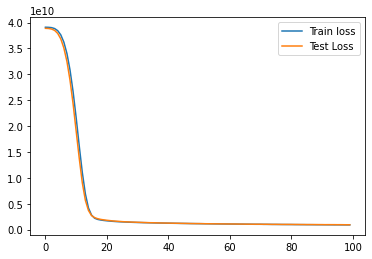

In [30]:
plt.plot(history.history['loss'], label='Train loss')
plt.plot(history.history['val_loss'], label='Test Loss')
plt.legend();

In [33]:
model3 = Sequential()
early_stop= EarlyStopping(patience=2)

In [34]:

model3.add(Dense(50, ## i changed the nodes for the first layer on this model
                 input_dim = input_shape, 
                activation = 'relu')) 

model3.add(Dense(20, 
                activation = 'relu')) 
model3.add(Dense(10, 
                activation = 'relu'))

In [35]:
model3.add(Dense(1, activation = 'linear'))

In [36]:
model3.compile(loss = 'mse', optimizer = 'adam')

In [40]:
history = model3.fit(X_train_pro, y_train,
                    validation_data = (X_test_pro, y_test),   ## added an early stop on my model and it was 
                    epochs=80,                                                          ##benificial since my model stops learning around the 58th epoch
                    callbacks=[early_stop])

Epoch 1/80
35/35 [==============================] - 1s 17ms/step - loss: 39090544640.0000 - val_loss: 38883848192.0000
Epoch 2/80
35/35 [==============================] - 0s 3ms/step - loss: 39088275456.0000 - val_loss: 38878871552.0000
Epoch 3/80
35/35 [==============================] - 0s 3ms/step - loss: 39076970496.0000 - val_loss: 38857519104.0000
Epoch 4/80
35/35 [==============================] - 0s 3ms/step - loss: 39036203008.0000 - val_loss: 38789767168.0000
Epoch 5/80
35/35 [==============================] - 0s 3ms/step - loss: 38923001856.0000 - val_loss: 38618058752.0000
Epoch 6/80
35/35 [==============================] - 0s 3ms/step - loss: 38662590464.0000 - val_loss: 38254010368.0000
Epoch 7/80
35/35 [==============================] - 0s 3ms/step - loss: 38150279168.0000 - val_loss: 37581361152.0000
Epoch 8/80
35/35 [==============================] - 0s 3ms/step - loss: 37262237696.0000 - val_loss: 36473049088.0000
Epoch 9/80
35/35 [==============================] - 0s 

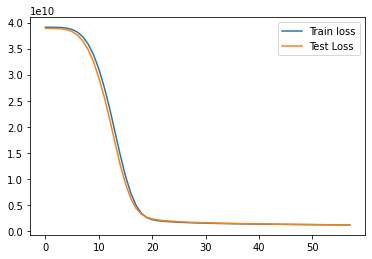

In [41]:
plt.plot(history.history['loss'], label='Train loss')
plt.plot(history.history['val_loss'], label='Test Loss')
plt.legend();

While, Not a lot of difference between the second and third models the third model only improved on what i already had. Im choosing the third model